<a href="https://colab.research.google.com/github/duke-sunshine/NYU_Econometrics_Summer2021/blob/main/Econometrics_Milestone6_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Timeseries variables


[Data Metrics](https://github.com/coinmetrics-io/data/blob/master/csv/metrics.csv)

In [6]:
import pandas as pd
import numpy as np

### import the data for Ethereum

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/coinmetrics-io/data/master/csv/eth.csv")
df['time']=pd.to_datetime(df_eth['time'])
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in10M,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2015-07-30,9206.0,5685.0,9203.0,9203.0,1237.0,9151.0,9203.0,145.0,8094.0,9203.0,9203.0,9203.0,9203.0,7952.0,122.0,9142.0,1017.0,9203.0,5363.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,6911.0,643.886124,NaN,NaN,NaN,NaN,NaN,0.0,3.382792e+11,1.213355e+11,...,7.204905e+07,7.204930e+07,4.050941e+07,7.201769e+07,7.204930e+07,7.204930e+07,7.204930e+07,7.204930e+07,7.204898e+07,7.200534e+07,3.853810e+07,5.890308e+07,7.102484e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.793308e+07,3.553810e+07,7.204930e+07,4.471633e+08,7.123930e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2015-07-31,424.0,5692.0,9359.0,9359.0,1238.0,9278.0,9359.0,145.0,8152.0,9359.0,9359.0,9359.0,9359.0,8003.0,122.0,9271.0,1018.0,9359.0,5368.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,6863.0,582.027976,NaN,NaN,NaN,NaN,NaN,0.0,8.231927e+11,6.029419e+11,...,7.208510e+07,7.208549e+07,4.050941e+07,7.205138e+07,7.208549e+07,7.208549e+07,7.208549e+07,7.208549e+07,7.208504e+07,7.203841e+07,3.853810e+07,5.891693e+07,7.104616e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.808693e+07,3.563810e+07,7.208549e+07,2.721499e+08,7.127549e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,2015-08-01,413.0,5699.0,9474.0,9474.0,1238.0,9368.0,9474.0,145.0,8188.0,9474.0,9474.0,9474.0,9474.0,8030.0,122.0,9360.0,1019.0,9474.0,5370.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5293.0,575.164179,NaN,NaN,NaN,NaN,NaN,0.0,9.566506e+11,8.872542e+11,...,7.211269e+07,7.211320e+07,4.050941e+07,7.207721e+07,7.211320e+07,7.211320e+07,7.211320e+07,7.211320e+07,7.211262e+07,7.206358e+07,3.853810e+07,5.893198e+07,7.106000e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.821198e+07,3.573810e+07,7.211320e+07,2.257182e+08,7.130320e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,2015-08-02,432.0,5708.0,9561.0,9561.0,1238.0,9456.0,9561.0,145.0,8223.0,9561.0,9561.0,9561.0,9561.0,8051.0,122.0,9443.0,1019.0,9561.0,5381.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5358.0,580.878686,NaN,NaN,NaN,NaN,NaN,0.0,1.102546e+12,1.020254e+12,...,7.214092e+07,7.214142e+07,4.050941e+07,7.210380e+07,7.214142e+07,7.214142e+07,7.214142e+07,7.214142e+07,7.214080e+07,7.208884e+07,3.853810e+07,5.893877e+07,7.108533e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.830877e+07,3.583810e+07,7.214142e+07,2.100940e+08,7.133142e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,2015-08-03,444.0,5715.0,9637.0,9637.0,1237.0,9520.0,9637.0,145.0,8262.0,9637.0,9637.0,9637.0,9637.0,8078.0,122.0,9508.0,1019.0,9637.0,5382.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5280.0,587.112311,NaN,NaN,NaN,NaN,NaN,0.0,1.154732e+12,1.125837e+12,...,7.216883e+07,7.216940e+07,4.050941e+07,7.213076e+07,7.216940e+07,7.216940e+07,7.216940e+07,7.216940e+07,7.216873e+07,7.211491e+07,3.853810e+07,5.8944

In [8]:
import plotly.express as px
import plotly.offline as py     
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
trace0 = go.Scatter(x = df["time"], y = df["TxTfrValAdjUSD"], hoverinfo='x+y', mode='lines',  name = 'Transactions, transfers, value, adjusted, USD')
trace1 = go.Scatter(x = df["time"], y = df['PriceUSD'], hoverinfo='x+y', mode='lines',  name = 'Price, USD')

layout = go.Layout(title="Can Transction value predict price? ", xaxis = dict(title="date"), yaxis = dict(title ="USD") ) 
data = [trace0, trace1]


fig1 = go.Figure(layout = layout, data = data) 
fig1.update_yaxes(type="log")
fig1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=3, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
          
        ])))
py.iplot(fig1)

### Calculate lag variables

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [11]:
df['PriceUSD_Minus_1']=df['PriceUSD'].shift(1)
df[['PriceUSD','PriceUSD_Minus_1']].tail()

,PriceUSD,PriceUSD_Minus_1
2146,2577.044739,2504.646392
2147,2552.741036,2577.044739
2148,2360.999387,2552.741036
2149,2368.388596,2360.999387
2150,2224.575320,2368.388596


###Calculate differences

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

In [12]:
df['PriceUSD_Diff_1']=df['PriceUSD'].diff(1)
df[['PriceUSD','PriceUSD_Diff_1']].tail()

,PriceUSD,PriceUSD_Diff_1
2146,2577.044739,72.398346
2147,2552.741036,-24.303702
2148,2360.999387,-191.741650
2149,2368.388596,7.389209
2150,2224.575320,-143.813276


### Calculate Growth Rate and Approximate Growth Rate

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

In [14]:
df['PriceUSD_Growth_1']=df['PriceUSD'].pct_change(1)
df['PriceUSD_Growth_Aprx_1']=np.log(df['PriceUSD']).diff(1)
df[['PriceUSD','PriceUSD_Growth_1','PriceUSD_Growth_Aprx_1']].tail()

,PriceUSD,PriceUSD_Growth_1,PriceUSD_Growth_Aprx_1
2146,2577.044739,0.028906,0.028496
2147,2552.741036,-0.009431,-0.009476
2148,2360.999387,-0.075112,-0.078083
2149,2368.388596,0.003130,0.003125
2150,2224.575320,-0.060722,-0.062644


In [18]:
trace0 = go.Scatter(x = df["time"], y = df["PriceUSD_Growth_1"], hoverinfo='x+y', mode='lines',  name = 'The Growth Rate of Price, Percentage')
trace1 = go.Scatter(x = df["time"], y = df['PriceUSD_Growth_Aprx_1'], hoverinfo='x+y', mode='lines',  name = 'The Growth Rate of Price Approximation, Percentage')

layout = go.Layout(title="Time series variables", xaxis = dict(title="date"), yaxis = dict(title ="Percentage") ) 
data = [trace0, trace1]


fig1 = go.Figure(layout = layout, data = data) 
fig1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=3, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
          
        ])))
py.iplot(fig1)

### lag plot

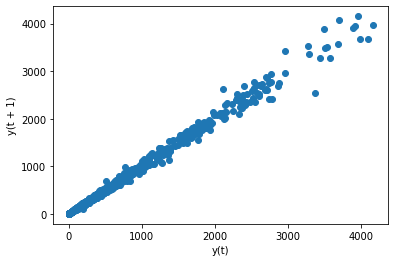

In [19]:
s=df['PriceUSD']
pd.plotting.lag_plot(s, lag=1)

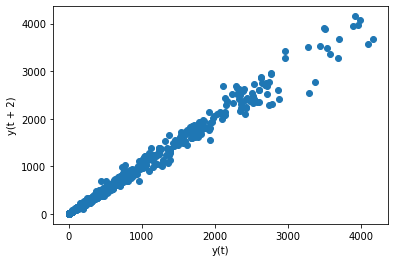

In [21]:
s=df['PriceUSD']
pd.plotting.lag_plot(s, lag=2)

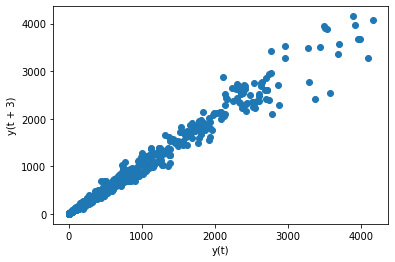

In [22]:
s=df['PriceUSD']
pd.plotting.lag_plot(s, lag=3)

### auto-correlation plot

https://pandas.pydata.org/docs/reference/api/pandas.plotting.autocorrelation_plot.html

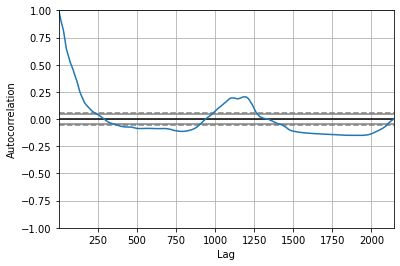

In [25]:
s=df['PriceUSD'].dropna()
pd.plotting.autocorrelation_plot(s)

#Auto Regressions


https://www.statsmodels.org/stable/regression.html

In [26]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [28]:
# define the dependent and independent variables
df=df.dropna()
X=df["PriceUSD_Minus_1"]
y=df['PriceUSD']

In [29]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,PriceUSD_Minus_1
374,1.0,10.990111
375,1.0,11.023301
376,1.0,11.309885
377,1.0,12.307074
378,1.0,12.094597


In [30]:
# conduct regression
model = sm.OLS(y, X).fit()

In [31]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               PriceUSD   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.659e+05
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        08:13:53   Log-Likelihood:                -9471.1
No. Observations:                1777   AIC:                         1.895e+04
Df Residuals:                    1775   BIC:                         1.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7249      1.462  